In [24]:
# récuperer le fichier de données brutes dans un dataframe nommé df
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('weatherAUS.csv')
#afficher les 10 première lignes
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [2]:
#% de valeurs nulles dans chaque variable
Val_nulles = pd.DataFrame({f"% NaN" : df.isna().sum()/145460*100}, index = df.columns)
Val_nulles["% NaN"] = Val_nulles["% NaN"].round(2)
Val_nulles

,% NaN
Date,0.00
Location,0.00
MinTemp,1.02
MaxTemp,0.87
Rainfall,2.24
Evaporation,43.17
Sunshine,48.01
WindGustDir,7.10
WindGustSpeed,7.06
WindDir9am,7.26


Les variables peuvent être divisées en 2 groupes : 

- Celles qui ont moins de 5% de NaN. 

**Pour celles là on peut raisonnablement supprimer les lignes concernées sans perdre trop de données**

- Celles qui ont plus de 5% de NaN.

**Pour celles là il serait mieux de remplacer les valeurs manquantes par une valeur cohérente. La question est donc par quelle valeur remplacer et comment l'obtenir?** 
    
Il parraitrait logique que les paramètres météos soient liés les uns les autres et qu'on puisse prédire, au moins partiellement, un paramètre à partir d'un autre. On va donc verifier cet hypothèse.

Pour cela on va séparer les variables avec plus de 5% de NaN en 2 groupes:

- Les variables quantitatives
- Les variables catégorielles
    

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


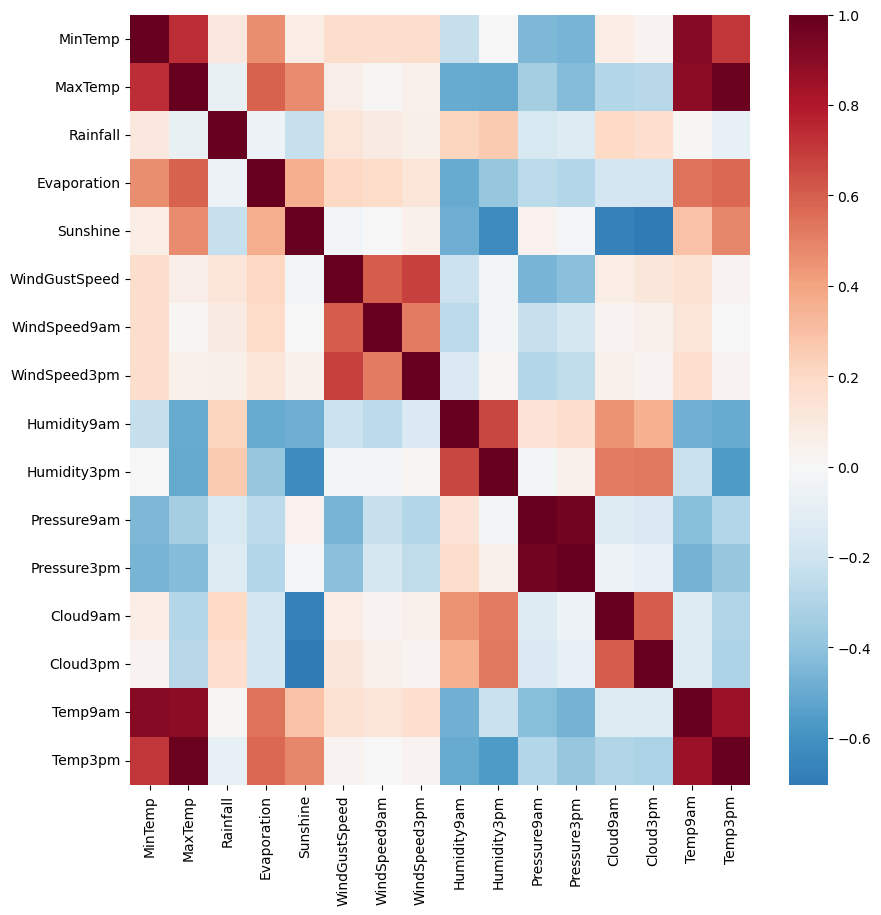

In [4]:
#on retire les variables catégorielles du jeu de donnée
df_corr = df.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','RainToday','WindGustDir', 'RainTomorrow'],axis = 1)

#On calcule la matrice de correlation et on la visualise à l'aide d'une heatmap
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), cmap='RdBu_r', center=0);
df_corr.corr()

On observe des groupes de variables fortement corrélées entre elles :

- Les 4 variables températures MinTemp, MaxTemp,Temp9am et Temp3pm sont correlées à hauteur de 70% minimum et jusqu'à 90% donc une correlation très forte
- Les 3 variables de vitesse de vent WindGustSpeed, WindSpeed9am, WindSpeed3pm à hauteur de 50% minimum et jusqu'à un peu moins de 70% docnc une correlation forte
- Les 2 variable d'humidité Humidity9am et Humidity3pm sont correllées entre elle à hauteur de 66%
- Les 2 variables de pression, Pressure9am et Pressure3pm sont très fortement corrélée, à hauteur de 96%
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm sont corrélées à hauteur de 60%

> à l'étape de machine learning il faudra voir s'il est possible/utile de synthétiser chacun de ces groupes en une seule variable

Il y a t'il des relations qui puissent être employées pour gerer des NaN?
> Peut on predire la valeur  d'une variable avec beaucoup de Nan à partir d'une ou plusieurs variables avec peu de Nan?

Quelles sont les variables avec beaucoup de NaN?
- La variable Sunshine avec presque 50% de NaN
- La variable Evaporation avec ~40% de NaN
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm avec ~40% de NaN
- Les 2 variables de pression, Pressure9am et Pressure3pm avec ~10% de NaN
- La variable WindGustSpeed avec ~7% de NaN

Prenons chaque variables ou groupe de variables riches en NaN au cas par cas en 

>Commençons par Sunshine :

Il y a une correlation de ~55% avec les temperatures et de ~40 % avec les humidités

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Figure size 700x700 with 0 Axes>

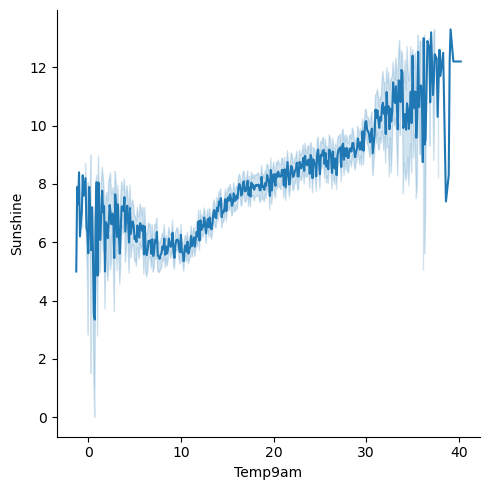

<Figure size 700x700 with 0 Axes>

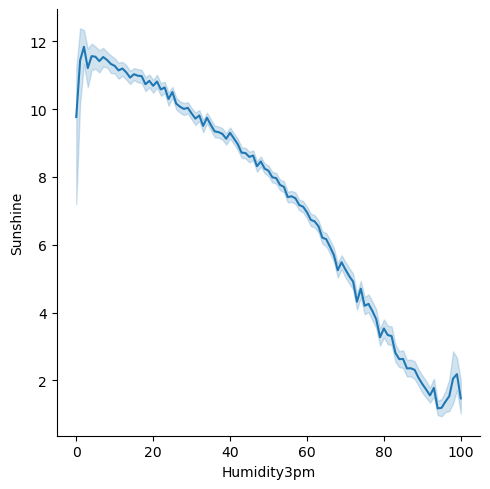

In [5]:
#plot des relations avec ces variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Temp9am',y = 'Sunshine', data = df, kind ='line')
plt.xlabel('Temp9am')
plt.ylabel('Sunshine');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Humidity3pm',y = 'Sunshine', data = df, kind ='line')
plt.xlabel('Humidity3pm')
plt.ylabel('Sunshine');

Un modèle linéaire satisfaisant devrait pouvoir être établit avec la variable Humidity3pm pour des humidités entre 5 et 90%, le modèle devrait être moins précis en dehors de ces humidités.
> A quelles valeurs d'humidité sont placées les NaN ?

Text(0, 0.5, 'Counts')

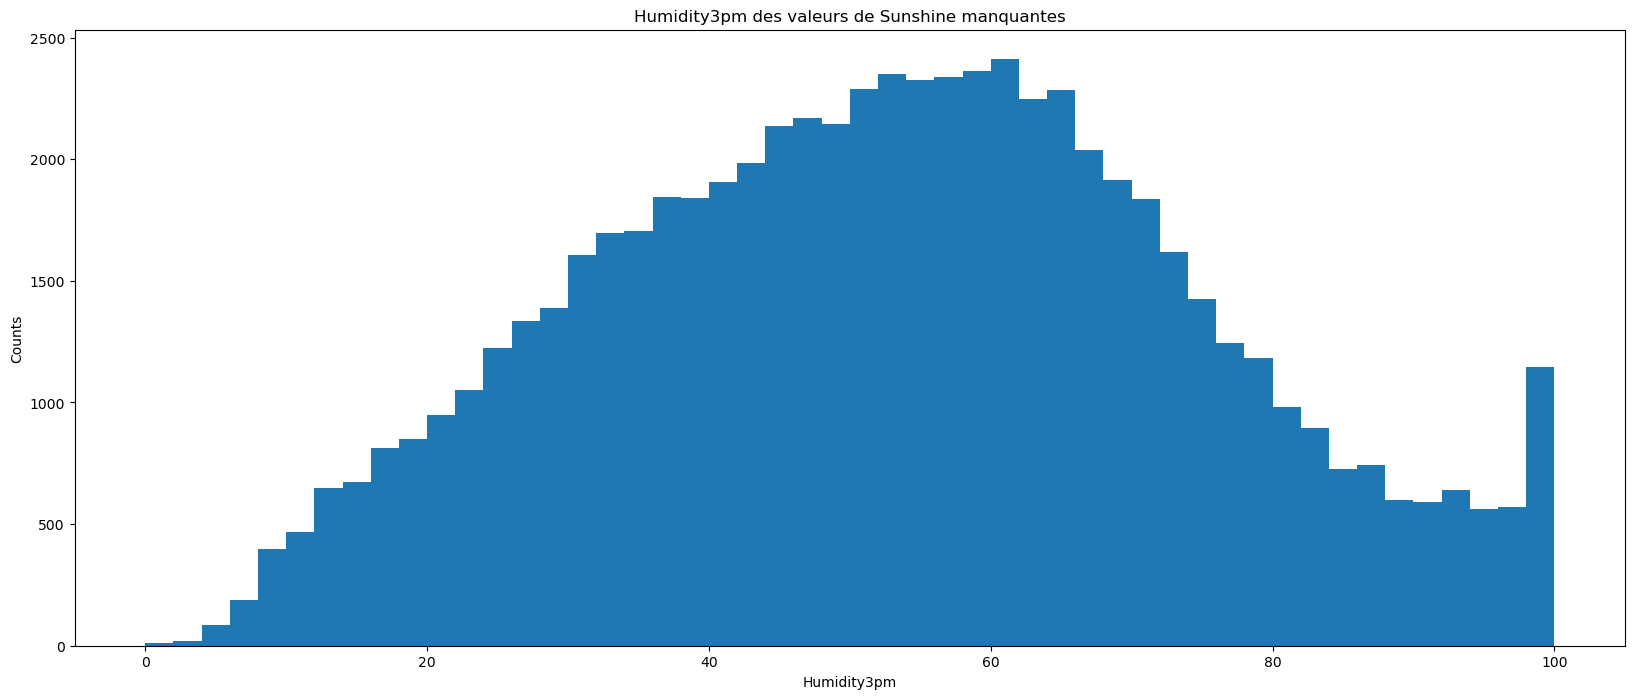

In [16]:
#On s'interesse à la repartition des valeurs d'humidité pour les modalités manquantes de Sunshine'

fig = plt.figure(figsize=(20, 8))
hum_sun_nan = df['Humidity3pm'].loc[df['Sunshine'].isna()]
plt.hist(x = hum_sun_nan, bins = 50),
plt.title(f"Humidity3pm des valeurs de Sunshine manquantes");
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')


De manière globale la grande majorité des Nan sont dans la gamme d'humidités où le modèle sera très performant.
> Note pour plus tard: il va falloir s'interesser aux données avec 100% d'HR car cela correspond à un air saturé en humidité où devrait se former de l'eau liquide (et donc des nuages)


>Passons Maintenant à la variable Evaporation:

Il y a une correlation de ~50% avec les temperatures et de ~60 % avec les humidités

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

<Figure size 700x700 with 0 Axes>

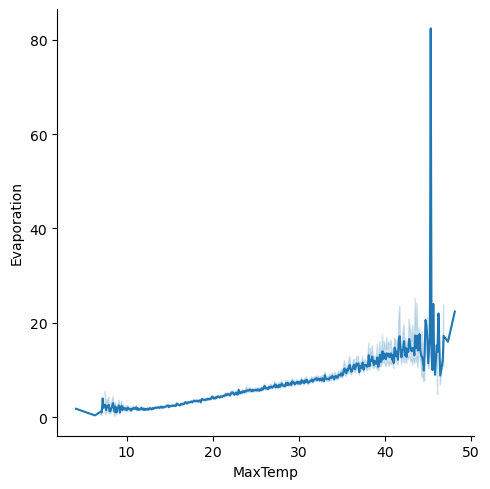

<Figure size 700x700 with 0 Axes>

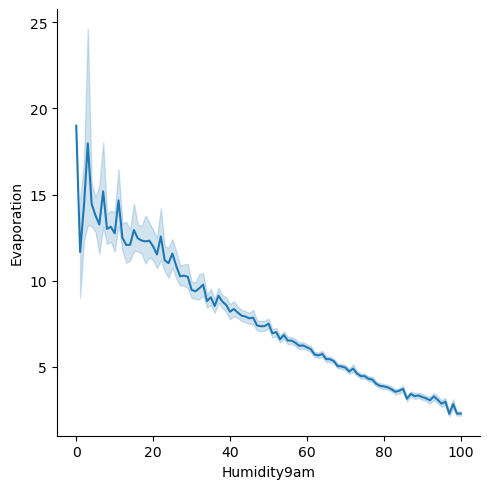

In [8]:
#plot des relations avec ces variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'MaxTemp',y = 'Evaporation', data = df, kind ='line')
plt.xlabel('MaxTemp')
plt.ylabel('Evaporation');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Humidity9am',y = 'Evaporation', data = df, kind ='line')
plt.xlabel('Humidity9am')
plt.ylabel('Evaporation');

L'humidité est ici aussi un bon candidat pour prédire Evaporation, et là encore ce modèle serait moins performant pour des humidités faibles <10-15%:

> A quelles valeurs d'humidité sont placées les NaN ?

Text(0, 0.5, 'Counts')

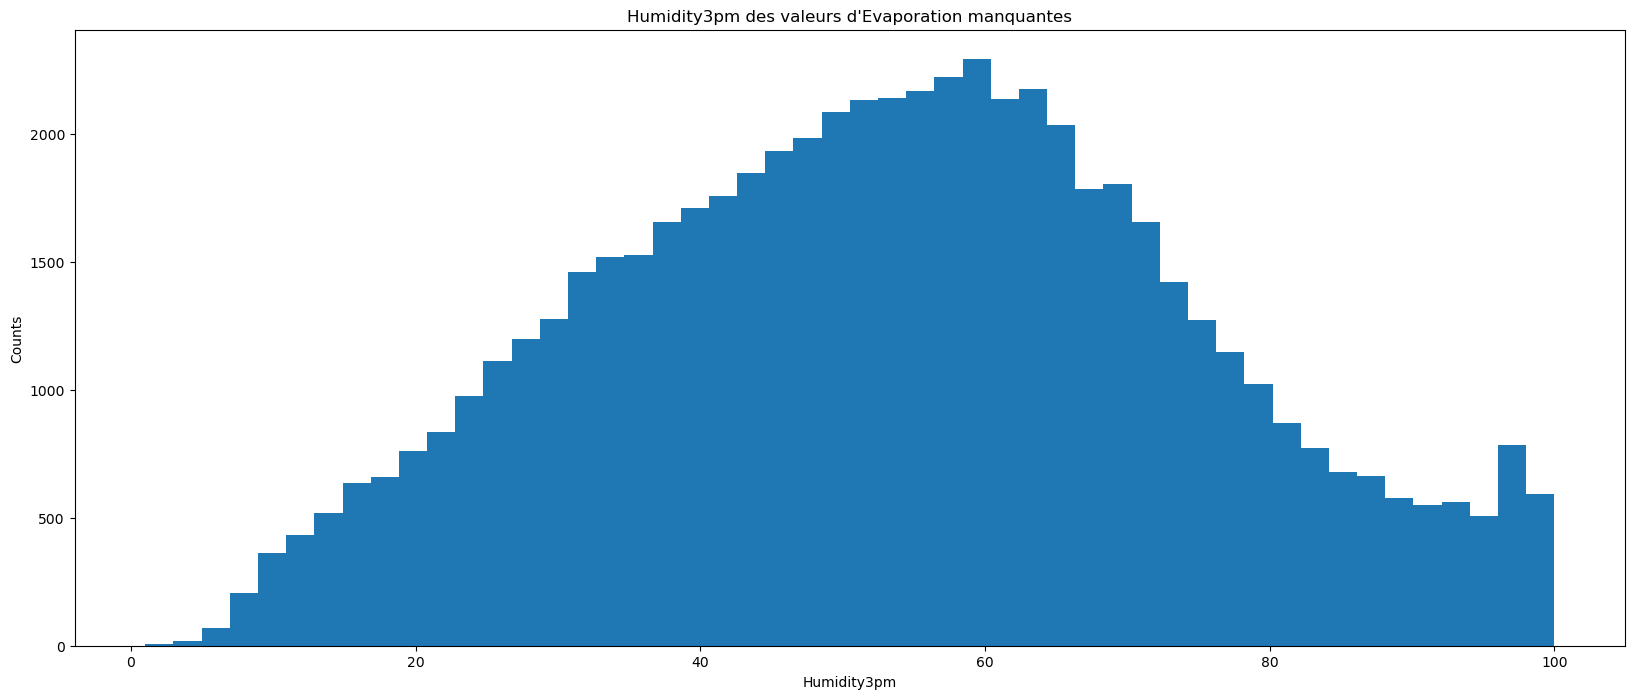

In [17]:
#On s'interesse à la repartition des valeurs d'humidité pour les modalités manquantes d'evaporation'

fig = plt.figure(figsize=(20, 8))
hum_evap_nan = df['Humidity3pm'].loc[df['Evaporation'].isna()]
plt.hist(x = hum_evap_nan, bins = 50),
plt.title(f"Humidity3pm des valeurs d'Evaporation manquantes");
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')

De manière globale la grande majorité des Nan sont dans la gamme d'humidités où le modèle sera très performant.

>Passons maintenant aux variables Cloud représentant la couverture nuageuse:

Il y a une correlation de ~60 % avec les humidités, autrement elles sont également corrélée avec Sunshine qui a beaucoup de NaN à hauteur de 67%

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

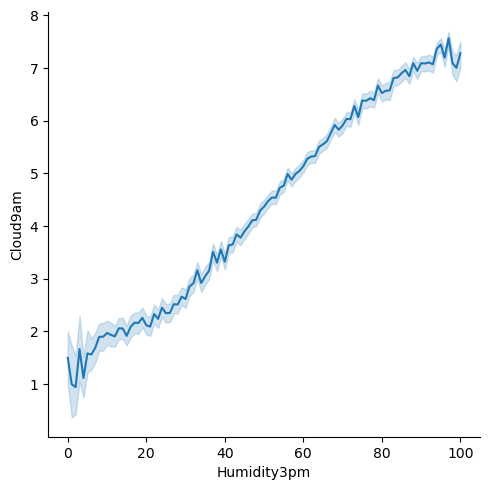

<Figure size 700x700 with 0 Axes>

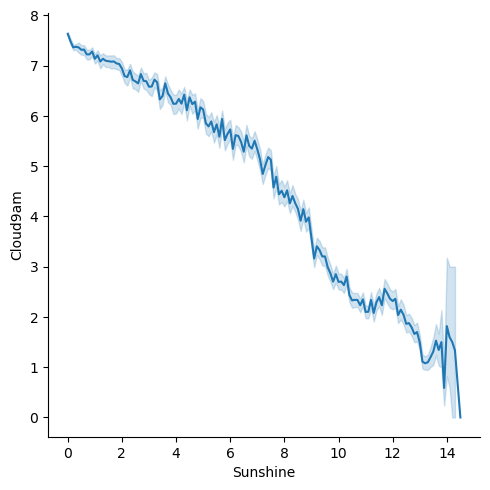

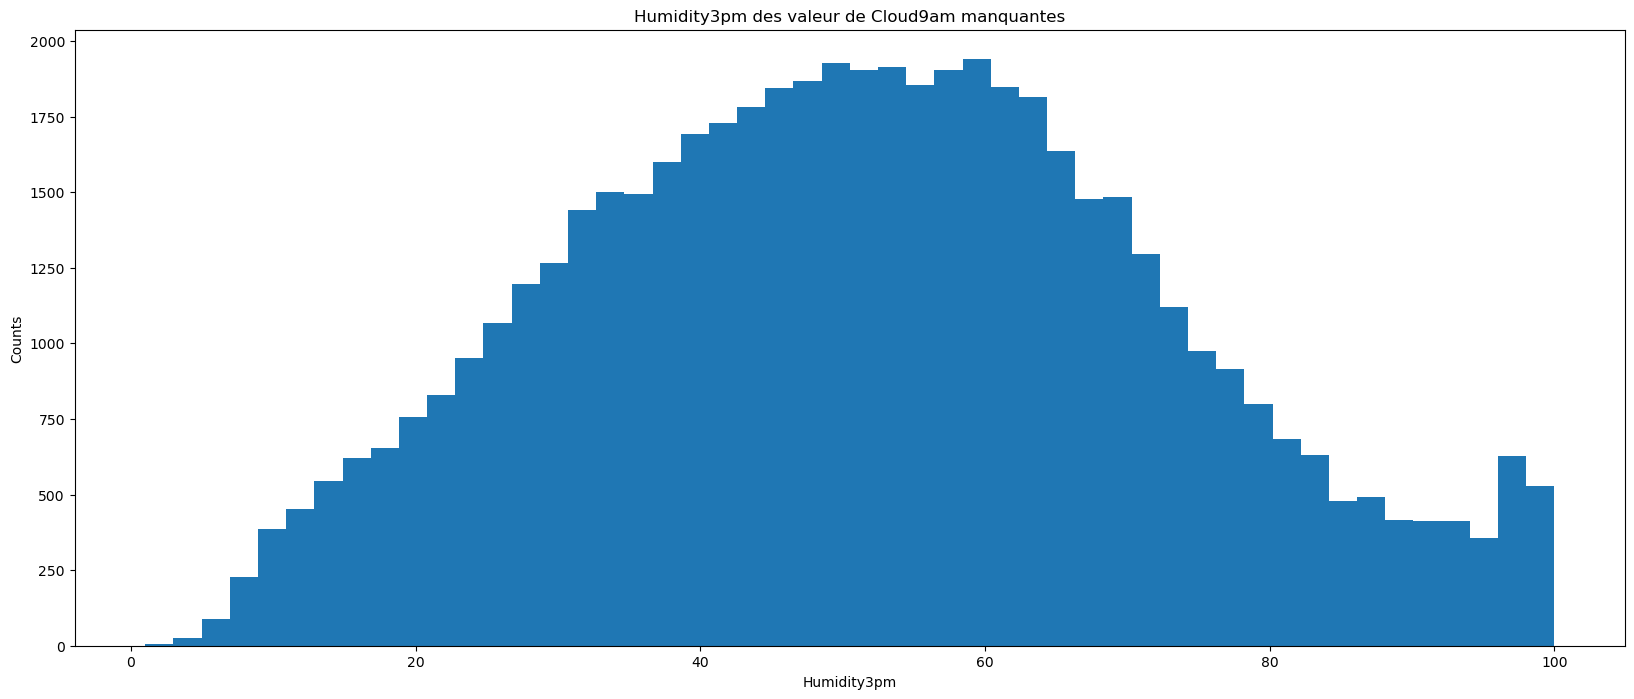

In [18]:
#plot des variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Humidity3pm',y = 'Cloud9am', data = df, kind ='line')
plt.xlabel('Humidity3pm')
plt.ylabel('Cloud9am');

fig = plt.figure(figsize=(7, 7))
sns.relplot(x = 'Sunshine',y = 'Cloud9am', data = df, kind ='line')
plt.xlabel('Sunshine')
plt.ylabel('Cloud9am');

#On s'interesse à la repartition des valeurs d'humidité pour les modalités manquantes de pnuages

fig = plt.figure(figsize=(20, 8))
hum_clouda_nan = df['Humidity3pm'].loc[df['Cloud9am'].isna()]
plt.hist(x = hum_clouda_nan, bins = 50),
plt.title(f"Humidity3pm des valeur de Cloud9am manquantes")
plt.xlabel('Humidity3pm')
plt.ylabel('Counts')

Il devrait être possible de modéliser les variables de couverture nuageuse avec les valeurs d'humidité relative

> Passons maintenant aux pressions :

Il y a une correlation de ~45 % avec les temperatures et de 45% avec Windgustspeed

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

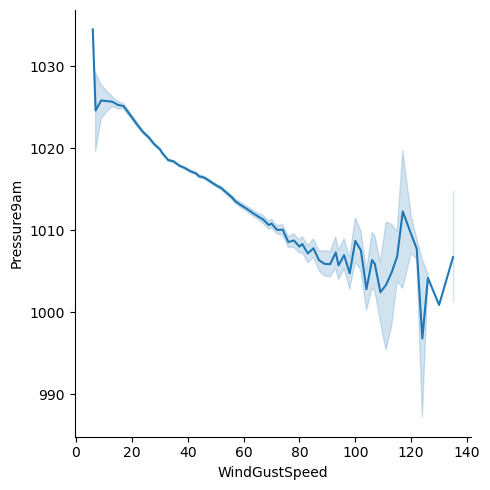

<Figure size 700x700 with 0 Axes>

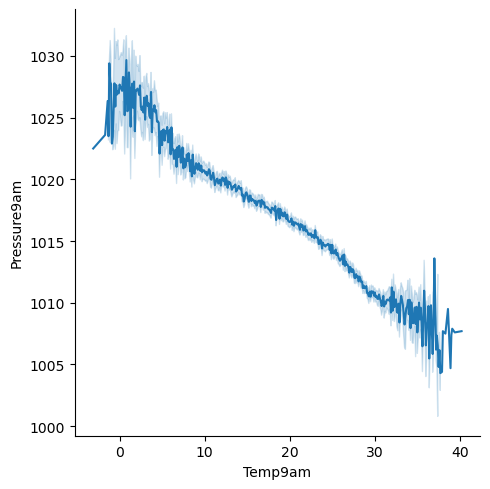

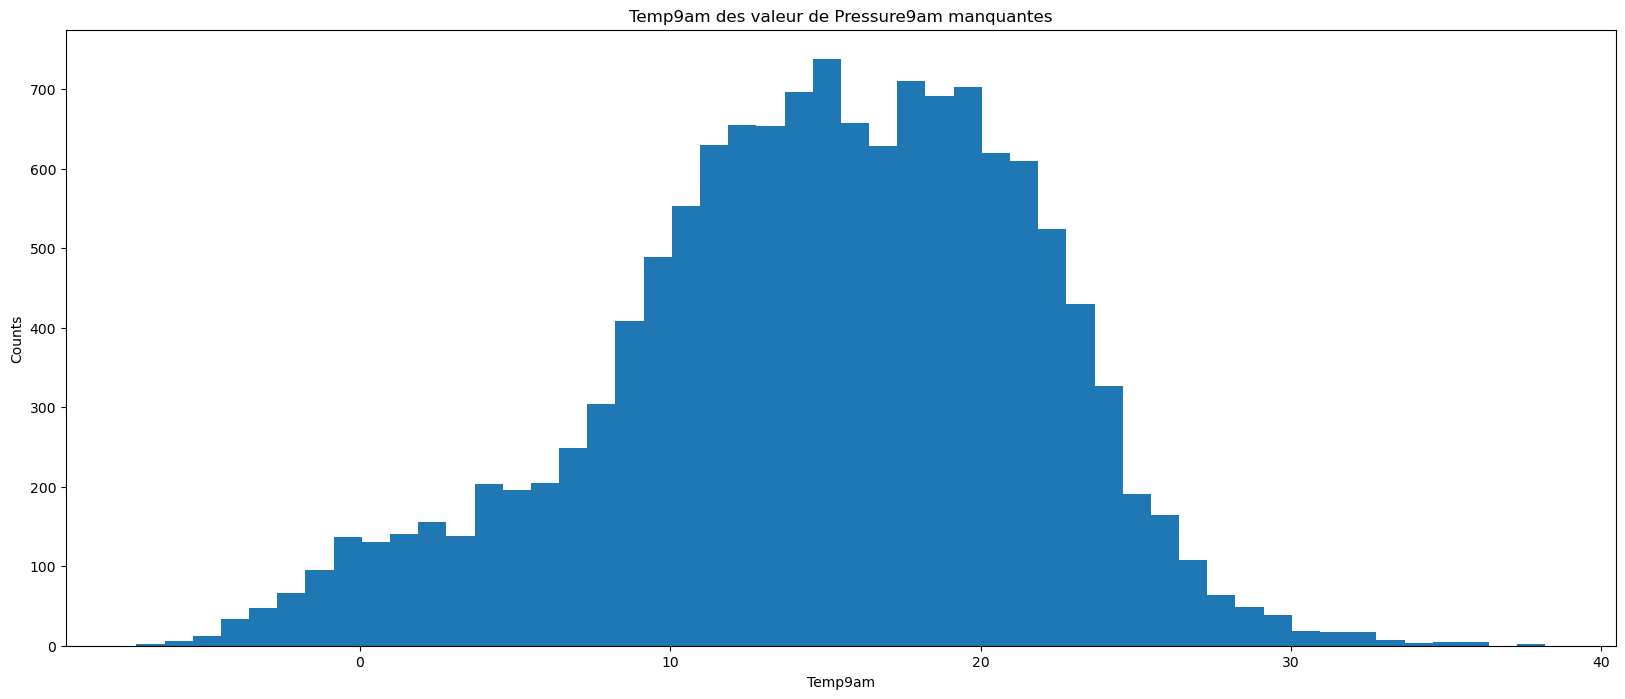

In [19]:
fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'WindGustSpeed',y = 'Pressure9am', data = df, kind ='line')
plt.xlabel('WindGustSpeed')
plt.ylabel('Pressure9am');

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'Temp9am',y = 'Pressure9am', data = df, kind ='line')
plt.xlabel('Temp9am')
plt.ylabel('Pressure9am');

#On s'interesse à la repartition des valeurs de températures pour les modalités manquantes de pression

fig = plt.figure(figsize=(20, 8))
temp_pressa_nan = df['Temp9am'].loc[df['Pressure9am'].isna()]
plt.hist(x = temp_pressa_nan, bins = 50),
plt.title(f"Temp9am des valeur de Pressure9am manquantes");
plt.xlabel('Temp9am')
plt.ylabel('Counts')


La température le matin est une bonne candidate pour prédire les valeurs de pressions

> Passons maintenant à la vitesse du vent :

Il y a une correlation de ~68 % avec WindSpeed3pm

c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cedri\anaconda3\envs\projetmeteo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Counts')

<Figure size 700x700 with 0 Axes>

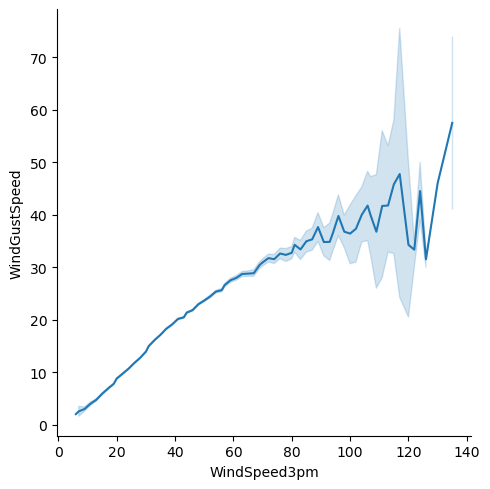

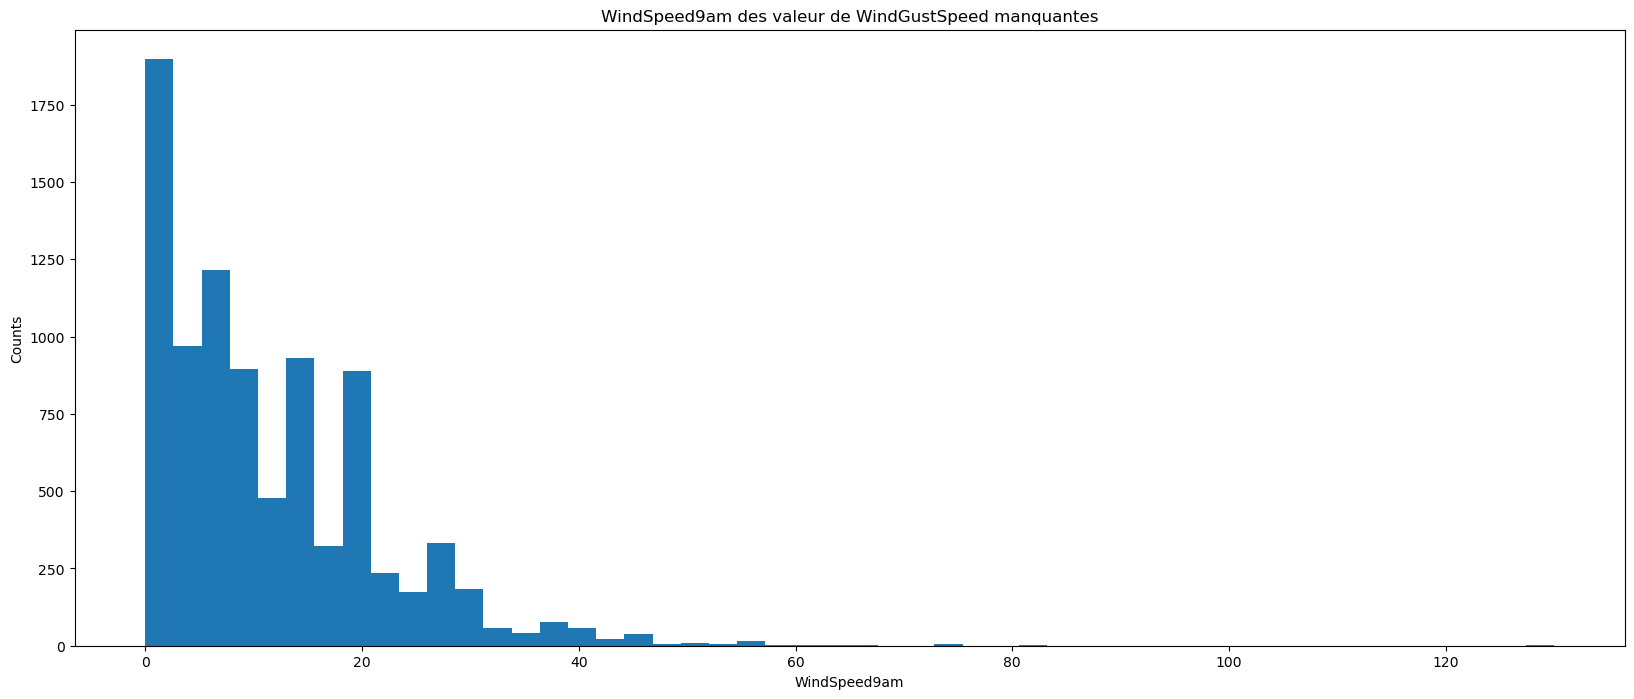

In [20]:
#plot des variables :

fig = plt.figure(figsize=(7, 7))
sns.relplot( x = 'WindGustSpeed',y = 'WindSpeed3pm', data = df, kind ='line')
plt.xlabel('WindSpeed3pm')
plt.ylabel('WindGustSpeed');

#On s'interesse à la repartition des valeurs de WindSpeed9am pour les modalités manquantes de WindGustSpeed

fig = plt.figure(figsize=(20, 8))
windm_winds_nan = df['WindSpeed9am'].loc[df['WindGustSpeed'].isna()]
plt.hist(x = windm_winds_nan, bins = 50),
plt.title(f"WindSpeed9am des valeur de WindGustSpeed manquantes");
plt.xlabel('WindSpeed9am')
plt.ylabel('Counts')

La variable WindGustSpeed devrait permettre de prédire WindGustSpeed avec satisfaction.

>Il reste maintenant à trouver une solution pour prédire les variables categorielles avec beaucoup de NaN.

Il s'agit des variables WindGustDir et WindDir9am avec environ 7% de NaN
La variables catégorielle WindDir3pm contient environ 3% de NaN Soit plus de 2 fois moins. Intuitivement on pourrait se dire que ces trois variables sont correlées puisqu'elles traitent toutes 3 de la direction du vent un même jour. Il faudrait donc le verifier

> Commonçons par WindGustSpeed:

La p-value du test d'independance de Khi-deux est de 0.000000e+00, on rejette donc H0 au profit de H1,
La valeur nulle de la p-value est peut être due à un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test étant très grande : 241953


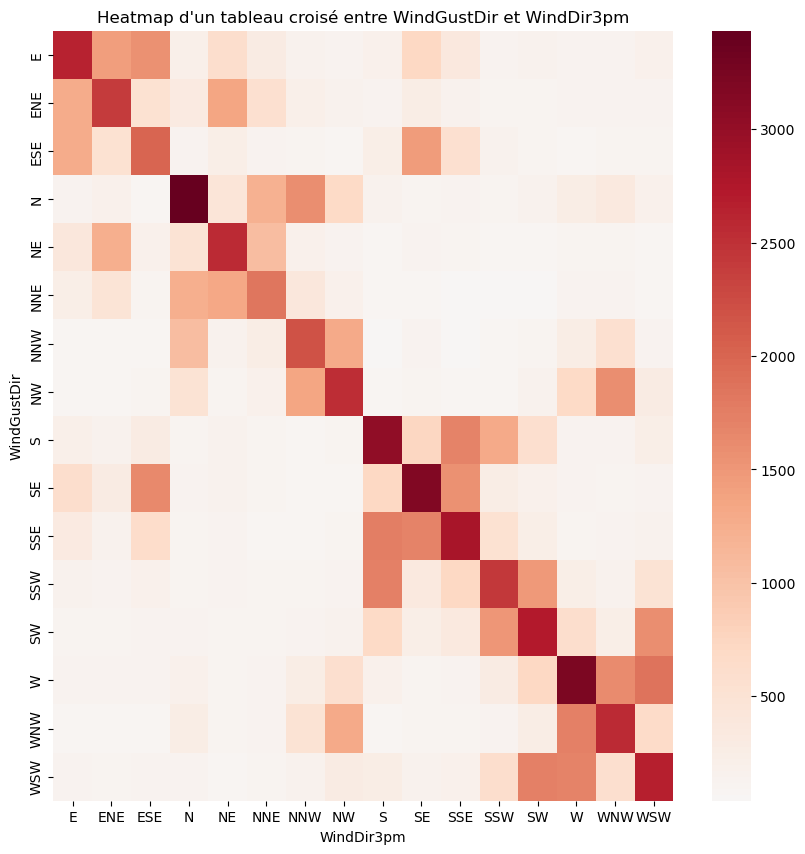

In [22]:
#On fait un tableau croisé entre les 2 variables

fig = plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df.WindGustDir, df.WindDir3pm), cmap='RdBu_r', center=0);
plt.title("Heatmap d'un tableau croisé entre WindGustDir et WindDir3pm");

tab = pd.crosstab(df.WindGustDir, df.WindDir3pm)

## Test de Khi deux : 
## Hypothèses : 
# 𝐻0 : La variable WindGustDir est indépendante de WindDir3pm
# H1 : La variable WindGustDir n'est pas indépendante de WindDir3pm

from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(tab)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print(f"La p-value du test d'independance de Khi-deux est de {p_valeur:.6e}, on rejette donc H0 au profit de H1,")
print(f"La valeur nulle de la p-value est peut être due à un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test étant très grande : {statistique:.0f}")


> passons maintenant à WindDir9am:

La p-value du test d'independance de Khi-deux est de 0.000000e+00, on rejette donc H0 au profit de H1,
la valeur nulle de la p-value est peut être due à un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test étant très grande : 81668


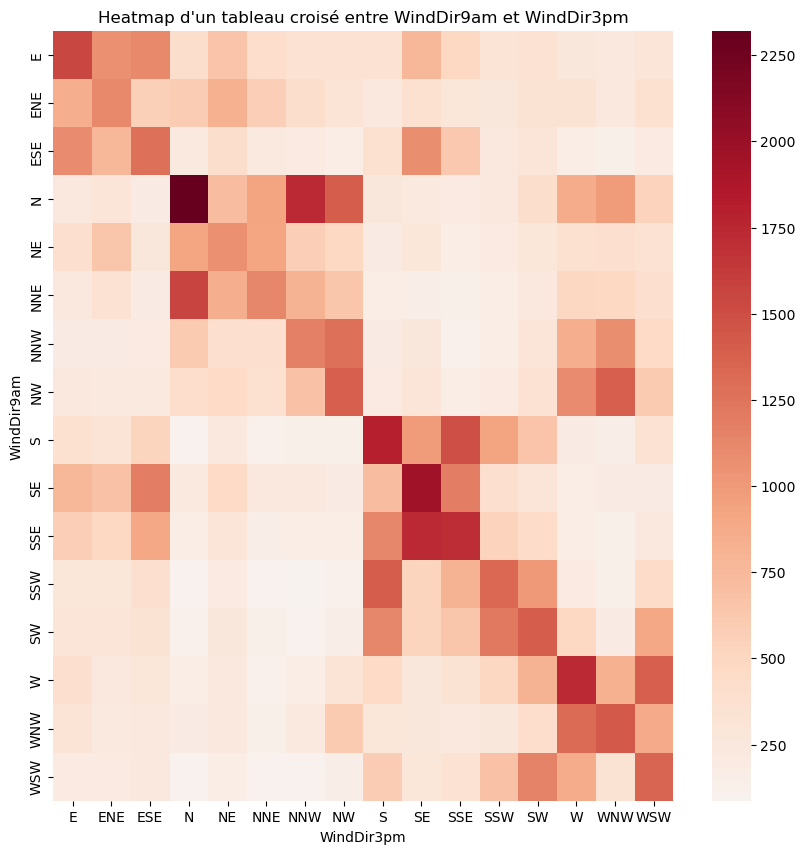

In [23]:
#On fait un tableau croisé entre les 2 variables

fig = plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df.WindDir9am, df.WindDir3pm), cmap='RdBu_r', center=0);
plt.title("Heatmap d'un tableau croisé entre WindDir9am et WindDir3pm");

tab = pd.crosstab(df.WindDir9am, df.WindDir3pm)

## Test de Khi deux : 
## Hypothèses : 
# 𝐻0 : La variable WindDir9am est indépendante de WindDir3pm
# H1 : La variable WindDir9am n'est pas indépendante de WindDir3pm

from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(tab)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print(f"La p-value du test d'independance de Khi-deux est de {p_valeur:.6e}, on rejette donc H0 au profit de H1,")
print(f"la valeur nulle de la p-value est peut être due à un arrondi d'une valeur extremement proche de zero, la valeur de la statistique de test étant très grande : {statistique:.0f}")


Ces trois varaibles sont liées entre elles comme attendu.
On peut même observer que les valeurs sont rapprochées pour des directions proches: S, SE, SSE, SSW et SW par exemple.
Là encore c'est logique puisque le vent ne change probablement pas brutalement de sens en une journée.
Il serait interessant d'introduire une notion ordinale dans cette variable catégorielle pour qu'un algorithme de classification puisse prendre en compte cette proximitée

----------------------------------------------------------Conclusion----------------------------------------------------------------

                                                       Pour gerer les NaN:

Les variables peuvent être divisées en 2 groupes : 

1. Celles qui ont moins de 5% de NaN. 

**Pour celles là on peut raisonnablement supprimer les lignes concernées sans perdre trop de données**

2. Celles qui ont plus de 5% de NaN.

**Pour celles là il serait mieux de remplacer les valeurs manquantes par une valeur cohérente.**



Pour cela on va séparer les variables avec plus de 5% de NaN en 2 groupes:


                                                   1. Les variables quantitatives

- La variable Sunshine avec presque 50% de NaN

**Peut être prédite avec l'humidite relative**
- La variable Evaporation avec ~40% de NaN

**Peut être prédite avec l'humidite relative**
- Les 2 variables de couverture nuageuse, Cloud9am et Cloud3pm avec ~40% de NaN

**Peut être prédite avec l'humidite relative**
- Les 2 variables de pression, Pressure9am et Pressure3pm avec ~10% de NaN

**Peut être prédite avec une température**
- La variable WindGustSpeed avec ~7% de NaN

**Peut être prédite avec une autre vitesse de vent**

                                                    2. Les variables catégorielles


- WindGustDir et WindDir9am avec environ 7% de NaN

**Devraient pouvoir être prédites avec WindDir3pm**



In [55]:
# Test d'un algo de classification


#Nettoyage sauvage des données :
dfs = df.dropna()




#Remplacement des valeurs d'orientation par une valeur ordinale de 0 à 16 dans le sens trigo en commençant par plein Est (correspondant à un angle de 0)
replace = {'SW' : 10,
 'SSW' : 11,
 'S' :12,
 'SSE': 13,
 'SE': 14,
 'ESE': 15,
 'E': 0,
 'ENE': 1,
 'NE': 2,
 'NNE': 3,
 'N': 4,
 'NNW': 5,
 'NW': 6,
 'WNW':7,
 'W':8,
 'WSW':9}

dfs.WindDir3pm = dfs.WindDir3pm.replace(replace);
print(dfs.WindDir9am.unique())
dfs['sin_WindDir3pm']=np.sin(dfs['WindDir3pm']*np.pi/8)
dfs['cos_WindDir3pm']=np.cos(dfs['WindDir3pm']*np.pi/8)
data = dfs[['sin_WindDir3pm','cos_WindDir3pm']]
target = dfs.WindDir9am

['ENE' 'SSE' 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW' 'ESE'
 'WSW' 'SW']


C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.WindDir3pm = dfs.WindDir3pm.replace(replace);
C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['sin_WindDir3pm']=np.sin(dfs['WindDir3pm']*np.pi/8)
C:\Users\cedri\AppData\Local\Temp\ipykernel_9640\1169782954.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2) 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn import svm
from sklearn import model_selection



In [61]:
clf = svm.SVC(gamma = 0.1, kernel = 'poly')

clf.fit(X_train_scaled, y_train)

SVC(gamma=0.1, kernel='poly')

In [64]:
parametres = {'C':[0.1,1,10], 'kernel': ['rbf', 'linear','poly'], 'gamma':[0.001, 0.1, 0.5]}

grid_clf = model_selection.GridSearchCV(clf, param_grid = parametres)

grid_clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(gamma=0.1, kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.1, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']})

In [65]:
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames = ['réel'], colnames = ['pred'])

pred,E,ENE,ESE,N,NNE,S,SE,SSE,SSW,SW,W,WNW
réel,,,,,,,,,,,,
E,165,203,95,96,37,41,69,40,46,39,67,18
ENE,83,199,35,137,61,13,34,18,32,52,57,23
ESE,105,123,118,40,20,22,95,44,33,39,38,10
N,23,75,20,507,81,28,15,24,26,26,107,73
NE,31,155,24,186,87,20,22,13,18,20,85,41
NNE,20,95,14,230,78,17,12,8,18,21,84,41
NNW,14,61,15,192,26,9,40,4,17,21,95,88
NW,23,65,18,104,28,12,30,18,16,22,112,88
S,33,45,47,28,9,142,88,101,91,71,37,17
